In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import illustris_python as il
import os

#For comparing
old_cat_path = "../data/tng-100-1/output"


In [2]:
def masses(df):
    keys = df.keys()
    for key in keys:
        if "Mass" in key:
            df[key] = df[key]*10**10
    return df

In [3]:
def late_type_SFR(df):
    """
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["SubhalosSFR"] < 0.036].index
    df_copy = df_copy.drop(index_names)
    """
    df_copy = df.copy(deep=True)
    index_names_1 = df_copy[df_copy["SubhalosSFR"] > 0.36].index
    df_copy = df_copy.drop(index_names_1)
    index_names_2 = df_copy[df_copy["SubhalosSFR"] < 0.036].index
    df_copy = df_copy.drop(index_names_2)
    
    return df_copy

def early_type_SFR(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["SubhalosSFR"] > 0.01148].index
    df_copy = df_copy.drop(index_names)
    return df_copy

def late_type_gas(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["SubhaloGasFraction"] < 0.1].index #Ferrero2020
    df_copy = df_copy.drop(index_names)
    return df_copy

def early_type_gas(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["SubhaloGasFraction"] > 0.1].index #Ferrero2020
    df_copy = df_copy.drop(index_names)
    return df_copy

def late_type_kappa(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["Kappa_rot"] < 0.6].index #Ferrero2020
    df_copy = df_copy.drop(index_names)
    return df_copy

def early_type_kappa(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["Kappa_rot"] > 0.6].index #Ferrero2020
    df_copy = df_copy.drop(index_names)
    return df_copy


In [13]:
old = pd.read_pickle("../data/tng-100-3/cutdata/Subhalo_Centrals_minE9_5_SM.pkl")
new = pd.read_pickle("../data/tng-100-3/catalogues/velocities_17030944.pkl")
print(new.keys())

old.sort_values(by="id", inplace = True)
new.sort_values(by="id", inplace = True)

print(len(old), len(new))

#Masses
old = masses(old)
new = masses(new)

#sSFR
new["SubhalosSFR"] = 10**(9)*new["SubhaloSFRTotal"]/new["SubhaloMassStellar"]
new["SubhaloGasFraction"] = new["SubhaloMassGas"]/new["SubhaloMassStellar"]

#old["SubhalosSFR"] = 10**(9)*old["SubhaloSFR"]/old["SubhaloMassStellar"]
old["SubhaloGasFraction"] = old["SubhaloMassInRadGas"]/old["SubhaloMassInRadStellar"]



Index(['id', 'SubhaloGalaxyRad', 'SubhaloRad', 'SubhaloMass200', 'SubhaloPosX',
       'SubhaloPosY', 'SubhaloPosZ', 'SubhaloVelX', 'SubhaloVelY',
       'SubhaloVelZ', 'SubhaloMassTotalGas', 'SubhaloMassTotalDM',
       'SubhaloMassTotalStellar', 'SubhaloMassStellar', 'SubhaloMassTotal',
       'SubhaloSFRTotal', 'SubhaloHalfmassRadStellar',
       'SubhaloHalfmassRadTotalStellar', 'SubhaloHalfmassRad_xy',
       'SubhaloHalfmassRad_xz', 'SubhaloHalfmassRad_yz',
       'SubhaloVelDispTotalStellar', 'SubhaloVelDispTotalStellar3D',
       'SubhaloVelDispTotalGas', 'SubhaloVelDispTotalGas3D',
       'SubhaloVelDispTotalDM', 'SubhaloVelDispTotalDM3D', 'SubhaloMassGas',
       'SubhaloMassDM', 'SubhaloMass', 'SubhaloVelDispStellar',
       'SubhaloVelDispStellar3D', 'SubhaloVelDispGas3D', 'SubhaloVelDispDM3D'],
      dtype='object')
2412 2385


In [24]:
old_id = np.array(old["id"])
new_id = np.array(new["id"])
for item in old_id:
    if item not in new_id:
        print(item)
print(new[new["id"] == 3403])

14216
15456
15829
15907
16237
16862
17512
17517
17520
17521
18388
18398
18435
18885
20624
21473
23678
23742
24737
24767
24790
25436
25559
28562
28955
29507
30180
      id SubhaloGalaxyRad SubhaloRad SubhaloMass200   SubhaloPosX  \
11  3403          92.0021    613.347    5.36388e+13  18217.932086   

    SubhaloPosY  SubhaloPosZ  SubhaloVelX  SubhaloVelY  SubhaloVelZ  ...  \
11   688.012623  9026.498203  -179.422129   551.158912   -72.452821  ...   

    SubhaloVelDispTotalDM3D  SubhaloMassGas  SubhaloMassDM   SubhaloMass  \
11               773.030463    1.050320e+11   4.856102e+12  5.102460e+12   

    SubhaloVelDispStellar  SubhaloVelDispStellar3D  SubhaloVelDispGas3D  \
11             215.490967               389.977035           316.952769   

    SubhaloVelDispDM3D  SubhalosSFR  SubhaloGasFraction  
11          689.566953          0.0            0.743189  

[1 rows x 36 columns]


In [5]:
#Make sure the same galaxies are selected, create late/early type catalogues
#new_earlies = early_type_SFR(early_type_gas(new))
#new_lates = late_type_SFR(late_type_gas(new))

new_earlies = early_type_gas(new)
new_lates = late_type_gas(new)

#new_earlies = early_type_kappa(early_type_gas(new))
#new_lates = late_type_kappa(late_type_gas(new))

#new_earlies = early_type_kappa(early_type_SFR(new))
#new_lates = late_type_kappa(late_type_SFR(new))

new_earlies_id = new_earlies["id"].values
new_lates_id = new_lates["id"].values
new_id = new["id"].values

old_earlies = old[old["id"].isin(new_earlies_id)]
old_lates = old[old["id"].isin(new_lates_id)]
old = old[old["id"].isin(new_id)]

print(len(new_earlies), len(new_lates), len(new)-len(new_earlies)-len(new_lates))
print(len(old_earlies), len(old_lates), len(old)-len(old_earlies)-len(old_lates))

305 2080 0
305 2080 0


In [6]:
#Log format
new_log = il.formatplot.log_formater(new)
old_log = il.formatplot.log_formater(old)
new_earlies_log = il.formatplot.log_formater(new_earlies)
old_earlies_log = il.formatplot.log_formater(old_earlies)
new_lates_log = il.formatplot.log_formater(new_lates)
old_lates_log = il.formatplot.log_formater(old_lates)

c:\Users\auror\TNG\src\illustris_python\formatplot.py:41: RuntimeWarning: divide by zero encountered in log10
  df_log[key] = np.log10(list(temp))
c:\Users\auror\TNG\src\illustris_python\formatplot.py:35: RuntimeWarning: divide by zero encountered in log10
  df_log[key] = np.log10(list(temp))
c:\Users\auror\TNG\src\illustris_python\formatplot.py:46: RuntimeWarning: divide by zero encountered in log10
  df_log[key] = np.log10(list(df[key]))


In [7]:
print(new["SubhaloGasFraction"])

0       1.360915
1       3.159954
2       4.328383
3       3.207268
4       1.617162
          ...   
2380    0.473475
2381    1.811398
2382    0.921892
2383    0.775980
2384    1.231152
Name: SubhaloGasFraction, Length: 2385, dtype: float64


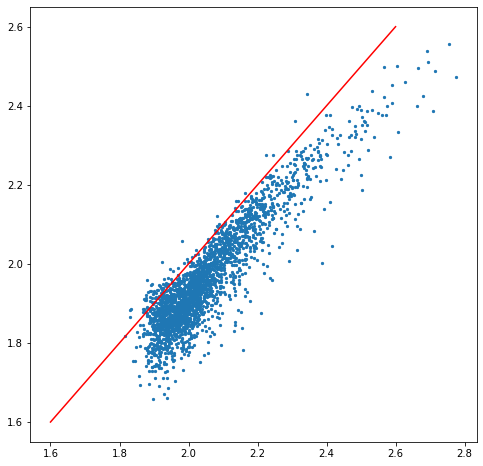

In [8]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_vals_log = old_log["SubhaloVelDisp"].values
new_vals_log = new_log["SubhaloVelDispStellar"].values

axs.scatter(old_vals_log, new_vals_log, s=5)

x = np.linspace(1.6, 2.6)
axs.plot(x, x, c="red", label = "y=x")

#il.formatplot.SM_SM(ax=axs)


C:\Users\auror\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\auror\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


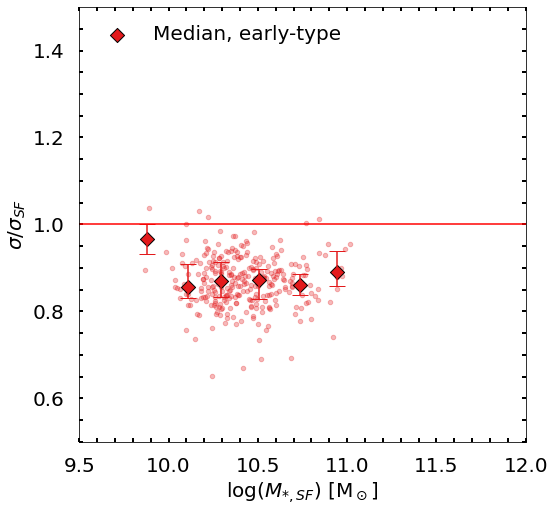

In [9]:
#Draw figure
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_vals_log = old_earlies_log["SubhaloMassStellar"].values
old_vals = np.array(old_earlies["SubhaloVelDisp"].values)
new_vals = np.array(new_earlies["SubhaloVelDispStellar3D"].values)*(1/3)**(1/2)
frac = new_vals/old_vals
axs.scatter(old_vals_log, frac, s=20, alpha=0.3, color="#e31a1c",)

#Plot median values
x_med, y_med, x_err, y_err = il.stats.median_errors(old_vals_log, frac, 9.5, 12)
axs.errorbar(x_med, y_med, yerr=y_err, capsize = 8, color="#e31a1c", marker='^', fmt = 'none')
axs.scatter(x_med, y_med, marker='D', s=100, color="#e31a1c", edgecolors = "black", label = r"Median, early-type")

x = np.linspace(0, 12, 2)
y = [1]*2
axs.plot(x, y, c="red")

il.formatplot.SM_fVD(ax=axs, x0=9.5, x1=12, y0=0.5, y1=1.5)
